In [1]:
import os
from pathlib import Path
import matplotlib.pyplot as plt
from influence_moo.env.mission import Mission
from influence_moo.plotting import plot_mission, plot_rollout
from influence_moo.env.env import OceanEnv
from influence_moo.config import load_config
from influence_moo.evo.network import NN

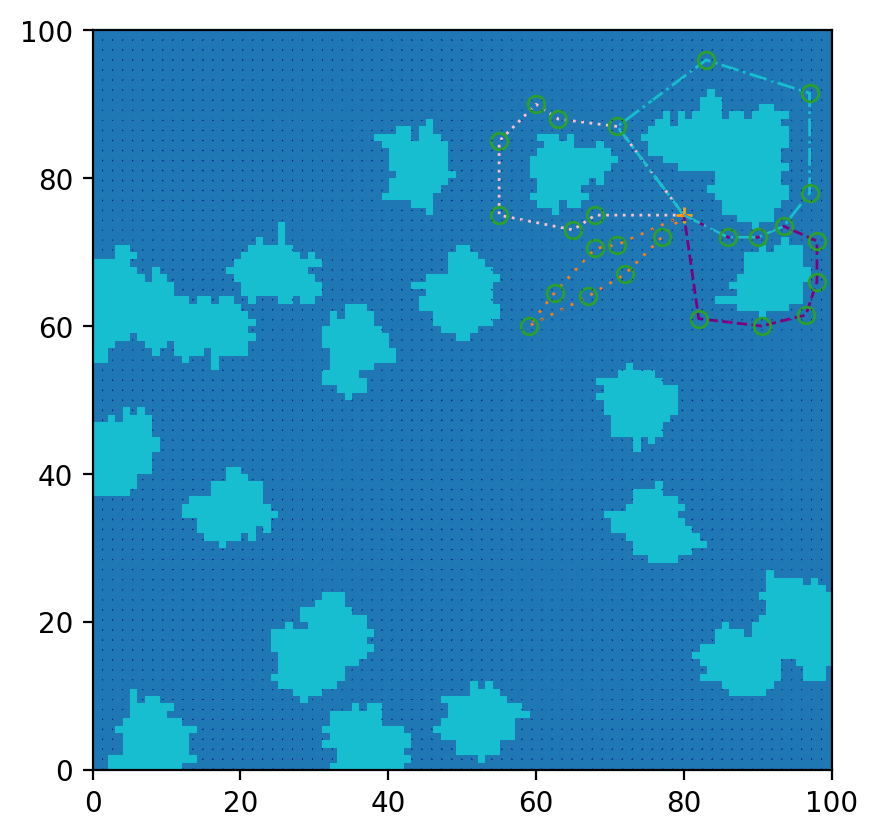

In [2]:
"""Load up the mission so we can see what the plan is"""
mission_dir = Path(os.getcwd()).parent / "missions" / "alpha"
mission = Mission(mission_dir)
fig, ax = plt.subplots(1,1,dpi=200)
plot_mission(mission,ax)

In [3]:
"""Set up an environment and see what happens with a random ASV policy"""
config = load_config('/home/gonzaeve/influence-multi-objective/configs/default.yaml')
env = OceanEnv(config)
asv_network = NN(num_inputs=10+env.mission.connectivity_grid.size, num_hidden=[20,20], num_outputs = 2)
env.run(asv_policy_functions=[asv_network.forward, asv_network.forward])

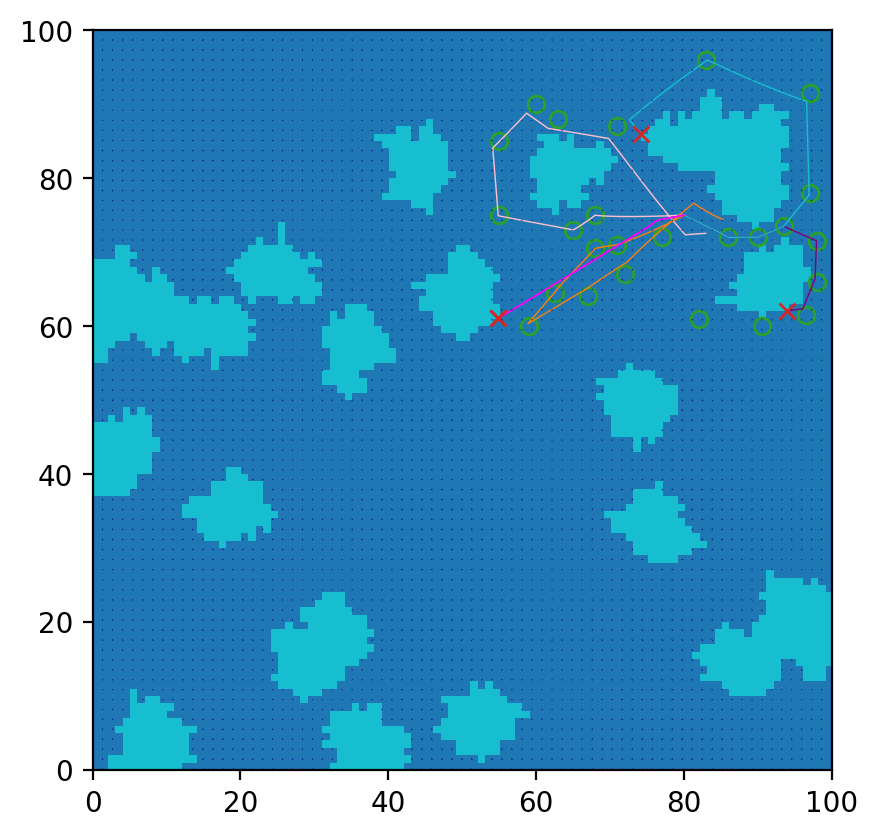

In [4]:
fig, ax = plt.subplots(1,1,dpi=200)
plot_rollout(env)